# Agglomerative Clustering of Zoo animals by class type

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

zoo = pd.read_csv('zoo.csv')

In [2]:
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo.groupby(['class_type']).sum()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
class_type,,,,,,,,,,,,,,,,
1,39,0,1,41,2,6,22,40,41,41,0,4,138,35,8,32
2,0,20,20,0,16,6,9,0,20,20,0,0,40,20,3,6
3,0,0,4,0,0,1,4,4,5,4,2,0,8,5,0,1
4,0,0,13,0,0,13,9,13,13,0,1,13,0,13,1,4
5,0,0,4,0,0,4,3,4,4,4,1,0,16,1,0,0
6,4,0,8,0,6,0,1,0,0,8,2,0,48,0,1,0
7,0,0,9,0,0,6,8,0,0,3,2,0,37,1,0,1


In [76]:
from sklearn.cluster import AgglomerativeClustering

X = zoo.drop(['animal_name', 'class_type'], axis = 1)

clustering = AgglomerativeClustering(n_clusters= 4).fit(X)

In [77]:
clustering

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [78]:
clustering.labels_

array([1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 0, 3, 3, 2, 2, 0, 1, 3, 3, 0, 0,
       1, 0, 2, 1, 1, 0, 1, 0, 2, 1, 0, 0, 3, 1, 1, 0, 3, 2, 2, 0, 2, 0,
       1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 3, 3, 3, 1, 1, 1,
       3, 1, 1, 1, 1, 0, 2, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 0, 0, 2, 3, 0,
       2, 1, 1, 1, 3, 0, 1, 0, 0, 2, 1, 3, 0])

In [79]:
zoo['cluster'] = clustering.labels_
zoo.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,cluster
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,3
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,1


([<matplotlib.axis.XTick at 0x7ff4b57aa450>],
 <a list of 1 Text xticklabel objects>)

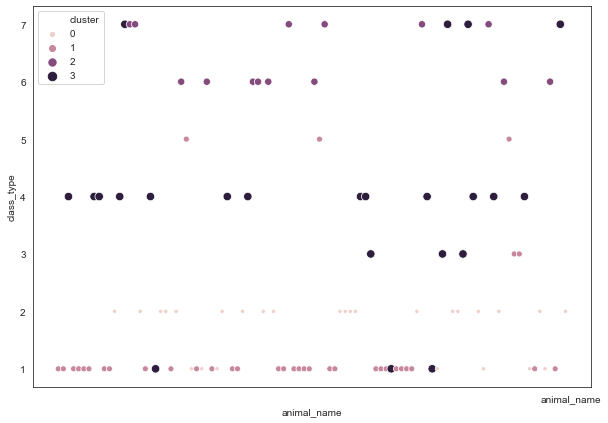

In [83]:
plt.figure(figsize= (10,7))
sns.set_style('white')
sns.scatterplot(x ='animal_name', y = 'class_type', data = zoo, hue = 'cluster', size = 'cluster')
plt.xticks('animal_name')